In [51]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
from sklearn import ensemble, cross_validation, learning_curve, metrics, tree

In [52]:
digits = load_digits()

In [53]:
X = digits.data
y = digits.target

In [54]:
k = 10

In [55]:
rf_classifier = tree.DecisionTreeClassifier(random_state = 1)

In [56]:
cv_scores = cross_validation.cross_val_score(rf_classifier, X, y, cv=k)

In [57]:
cv_mean = [cv_scores.mean()]

In [58]:
def write_answer(answer,name):
    with open(name, "w") as fout:
        fout.write(" ".join([str(num) for num in answer]))

In [59]:
write_answer(cv_mean, 'RandomForest_1.txt')

In [60]:
bag_cl_rf = ensemble.BaggingClassifier(rf_classifier, n_estimators=100)
cv_scores_bag = cross_validation.cross_val_score(bag_cl_rf, X, y, cv=k)

In [61]:
cv_scores_bag_mean = [cv_scores_bag.mean()]
write_answer(cv_scores_bag_mean, 'RandomForest_2.txt')

In [62]:
bag_cl_rf_2 = ensemble.BaggingClassifier(rf_classifier, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cv_scores_bag_2 = cross_validation.cross_val_score(bag_cl_rf_2, X, y, cv=k)

In [63]:
cv_scores_bag_mean = [cv_scores_bag_2.mean()]
write_answer(cv_scores_bag_mean, 'RandomForest_3.txt')

In [65]:
rf_classifier_2 = tree.DecisionTreeClassifier(random_state = 1, max_features=int(np.sqrt(X.shape[1])))
bag_cl_rf_3 = ensemble.BaggingClassifier(rf_classifier_2, n_estimators=100)
cv_scores_bag_3 = cross_validation.cross_val_score(bag_cl_rf_3, X, y, cv=k)

In [66]:
cv_scores_bag_mean = [cv_scores_bag_3.mean()]
write_answer(cv_scores_bag_mean, 'RandomForest_4.txt')

In [67]:
rf_cl = ensemble.RandomForestClassifier(random_state = 1, max_features=int(np.sqrt(X.shape[1])))
cv_scores_bag_4 = cross_validation.cross_val_score(rf_cl, X, y, cv=k)
cv_scores_bag_mean = [cv_scores_bag_4.mean()]
write_answer(cv_scores_bag_mean, 'RandomForest_5.txt')

In [ ]:
%pylab inline

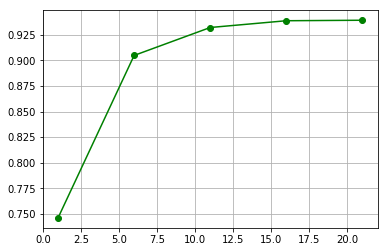

In [82]:
scores = []
space = arange(1, 25, 5)
for i in space:
    rf_cl = ensemble.RandomForestClassifier(n_estimators = int(i), random_state = 1, max_features=int(np.sqrt(X.shape[1])))
    cv_score = cross_validation.cross_val_score(rf_cl, X, y, cv=k)
    scores += [cv_score.mean()]
pylab.grid(True)
pylab.plot(space, scores, 'g-', marker='o')

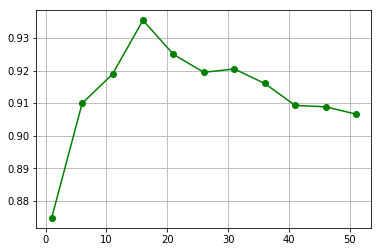

In [83]:
scores = []
space = arange(1, 55, 5)
for i in space:
    rf_cl = ensemble.RandomForestClassifier(random_state = 1, max_features=int(i))
    cv_score = cross_validation.cross_val_score(rf_cl, X, y, cv=k)
    scores += [cv_score.mean()]
pylab.grid(True)
pylab.plot(space, scores, 'g-', marker='o')

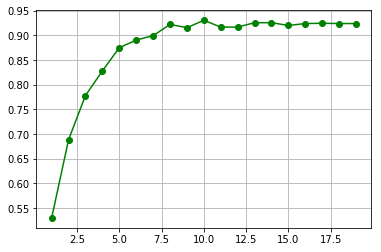

In [85]:
scores = []
space = np.arange(1, 20, 1)
for i in space:
    rf_cl = ensemble.RandomForestClassifier(random_state = 1, max_features=8, max_depth = i)
    cv_score = cross_validation.cross_val_score(rf_cl, X, y, cv=k)
    scores += [cv_score.mean()]
pylab.grid(True)
pylab.plot(space, scores, 'g-', marker='o')

In [86]:
answers = [2, 3, 4, 7]
write_answer(answers, 'RandomForest_6.txt')